# Виды распределений

Загрузить таблицу и построить график распределений. Найти нормальное распределение.

In [2]:
import numpy as np
from scipy.stats import t
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import io
import requests
import seaborn as sns

%matplotlib inline

Таблица цен на дома в Бостоне

Основные значения:

* CRIM: This is the per capita crime rate by town
* ZN: This is the proportion of residential land zoned for lots larger than 25,000 sq.ft.
* INDUS: This is the proportion of non-retail business acres per town.
* CHAS: This is the Charles River dummy variable (this is equal to 1 if tract bounds river; 0 otherwise)
* NOX: This is the nitric oxides concentration (parts per 10 million)
* RM: This is the average number of rooms per dwelling
* AGE: This is the proportion of owner-occupied units built prior to 1940
* DIS: This is the weighted distances to five Boston employment centers
* RAD: This is the index of accessibility to radial highways
* TAX: This is the full-value property-tax rate per 10,000 dollars
* PTRATIO: This is the pupil-teacher ratio by town
* B: This is calculated as 1000(Bk — 0.63)², where Bk is the proportion of people of African American descent by town
* LSTAT: This is the percentage lower status of the population
* MEDV: This is the median value of owner-occupied homes in 1000 dollars

In [2]:
url='http://yustiks.ru/housing.csv'
s=requests.get(url).content
names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data=pd.read_csv(io.StringIO(s.decode('utf-8')),  delim_whitespace=True, names=names)
data.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2

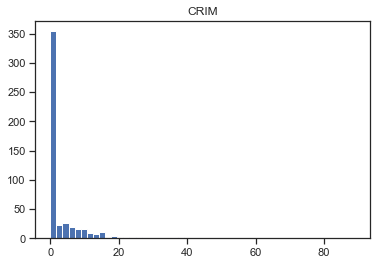

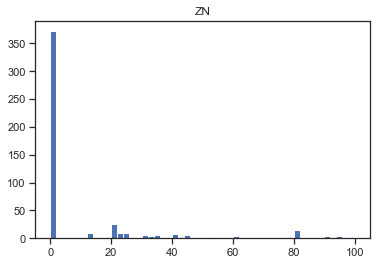

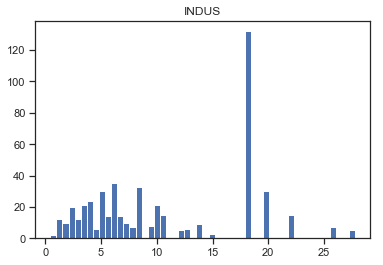

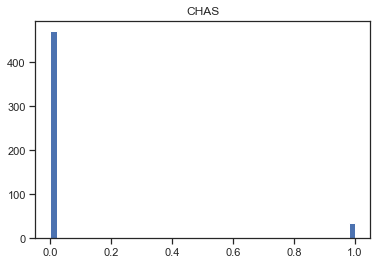

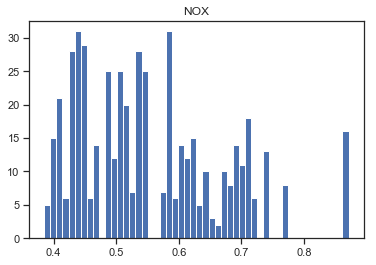

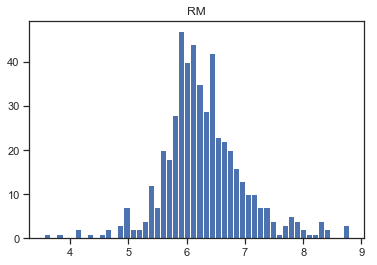

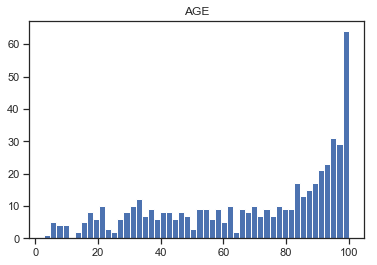

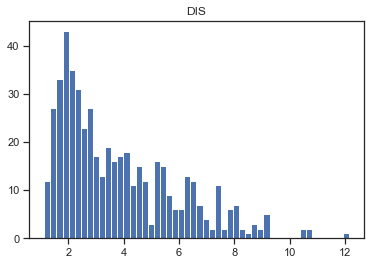

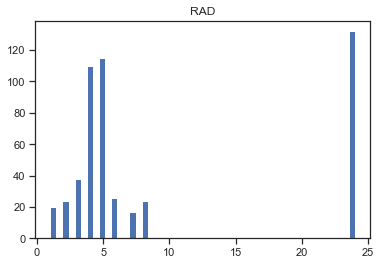

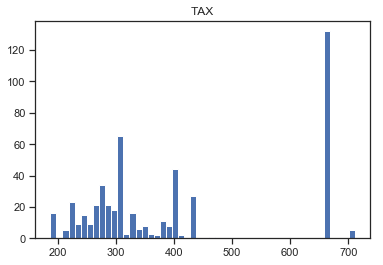

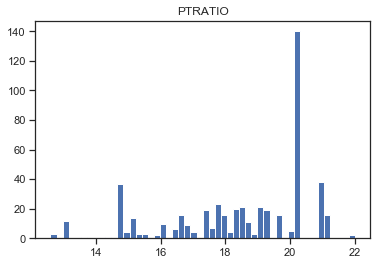

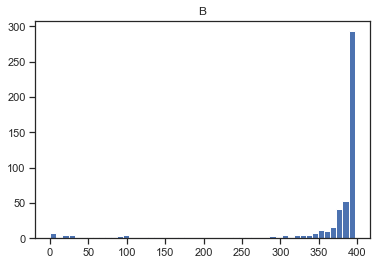

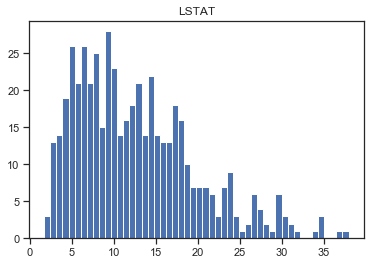

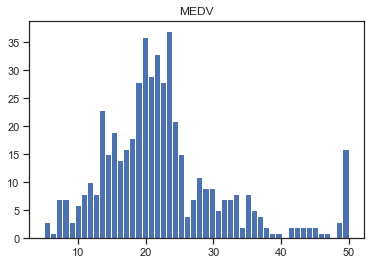

In [23]:
for col in data.columns:
    plt.figure()
    n, bins, patches = plt.hist(data[col], 50)
    plt.title(col)
    plt.show()
   

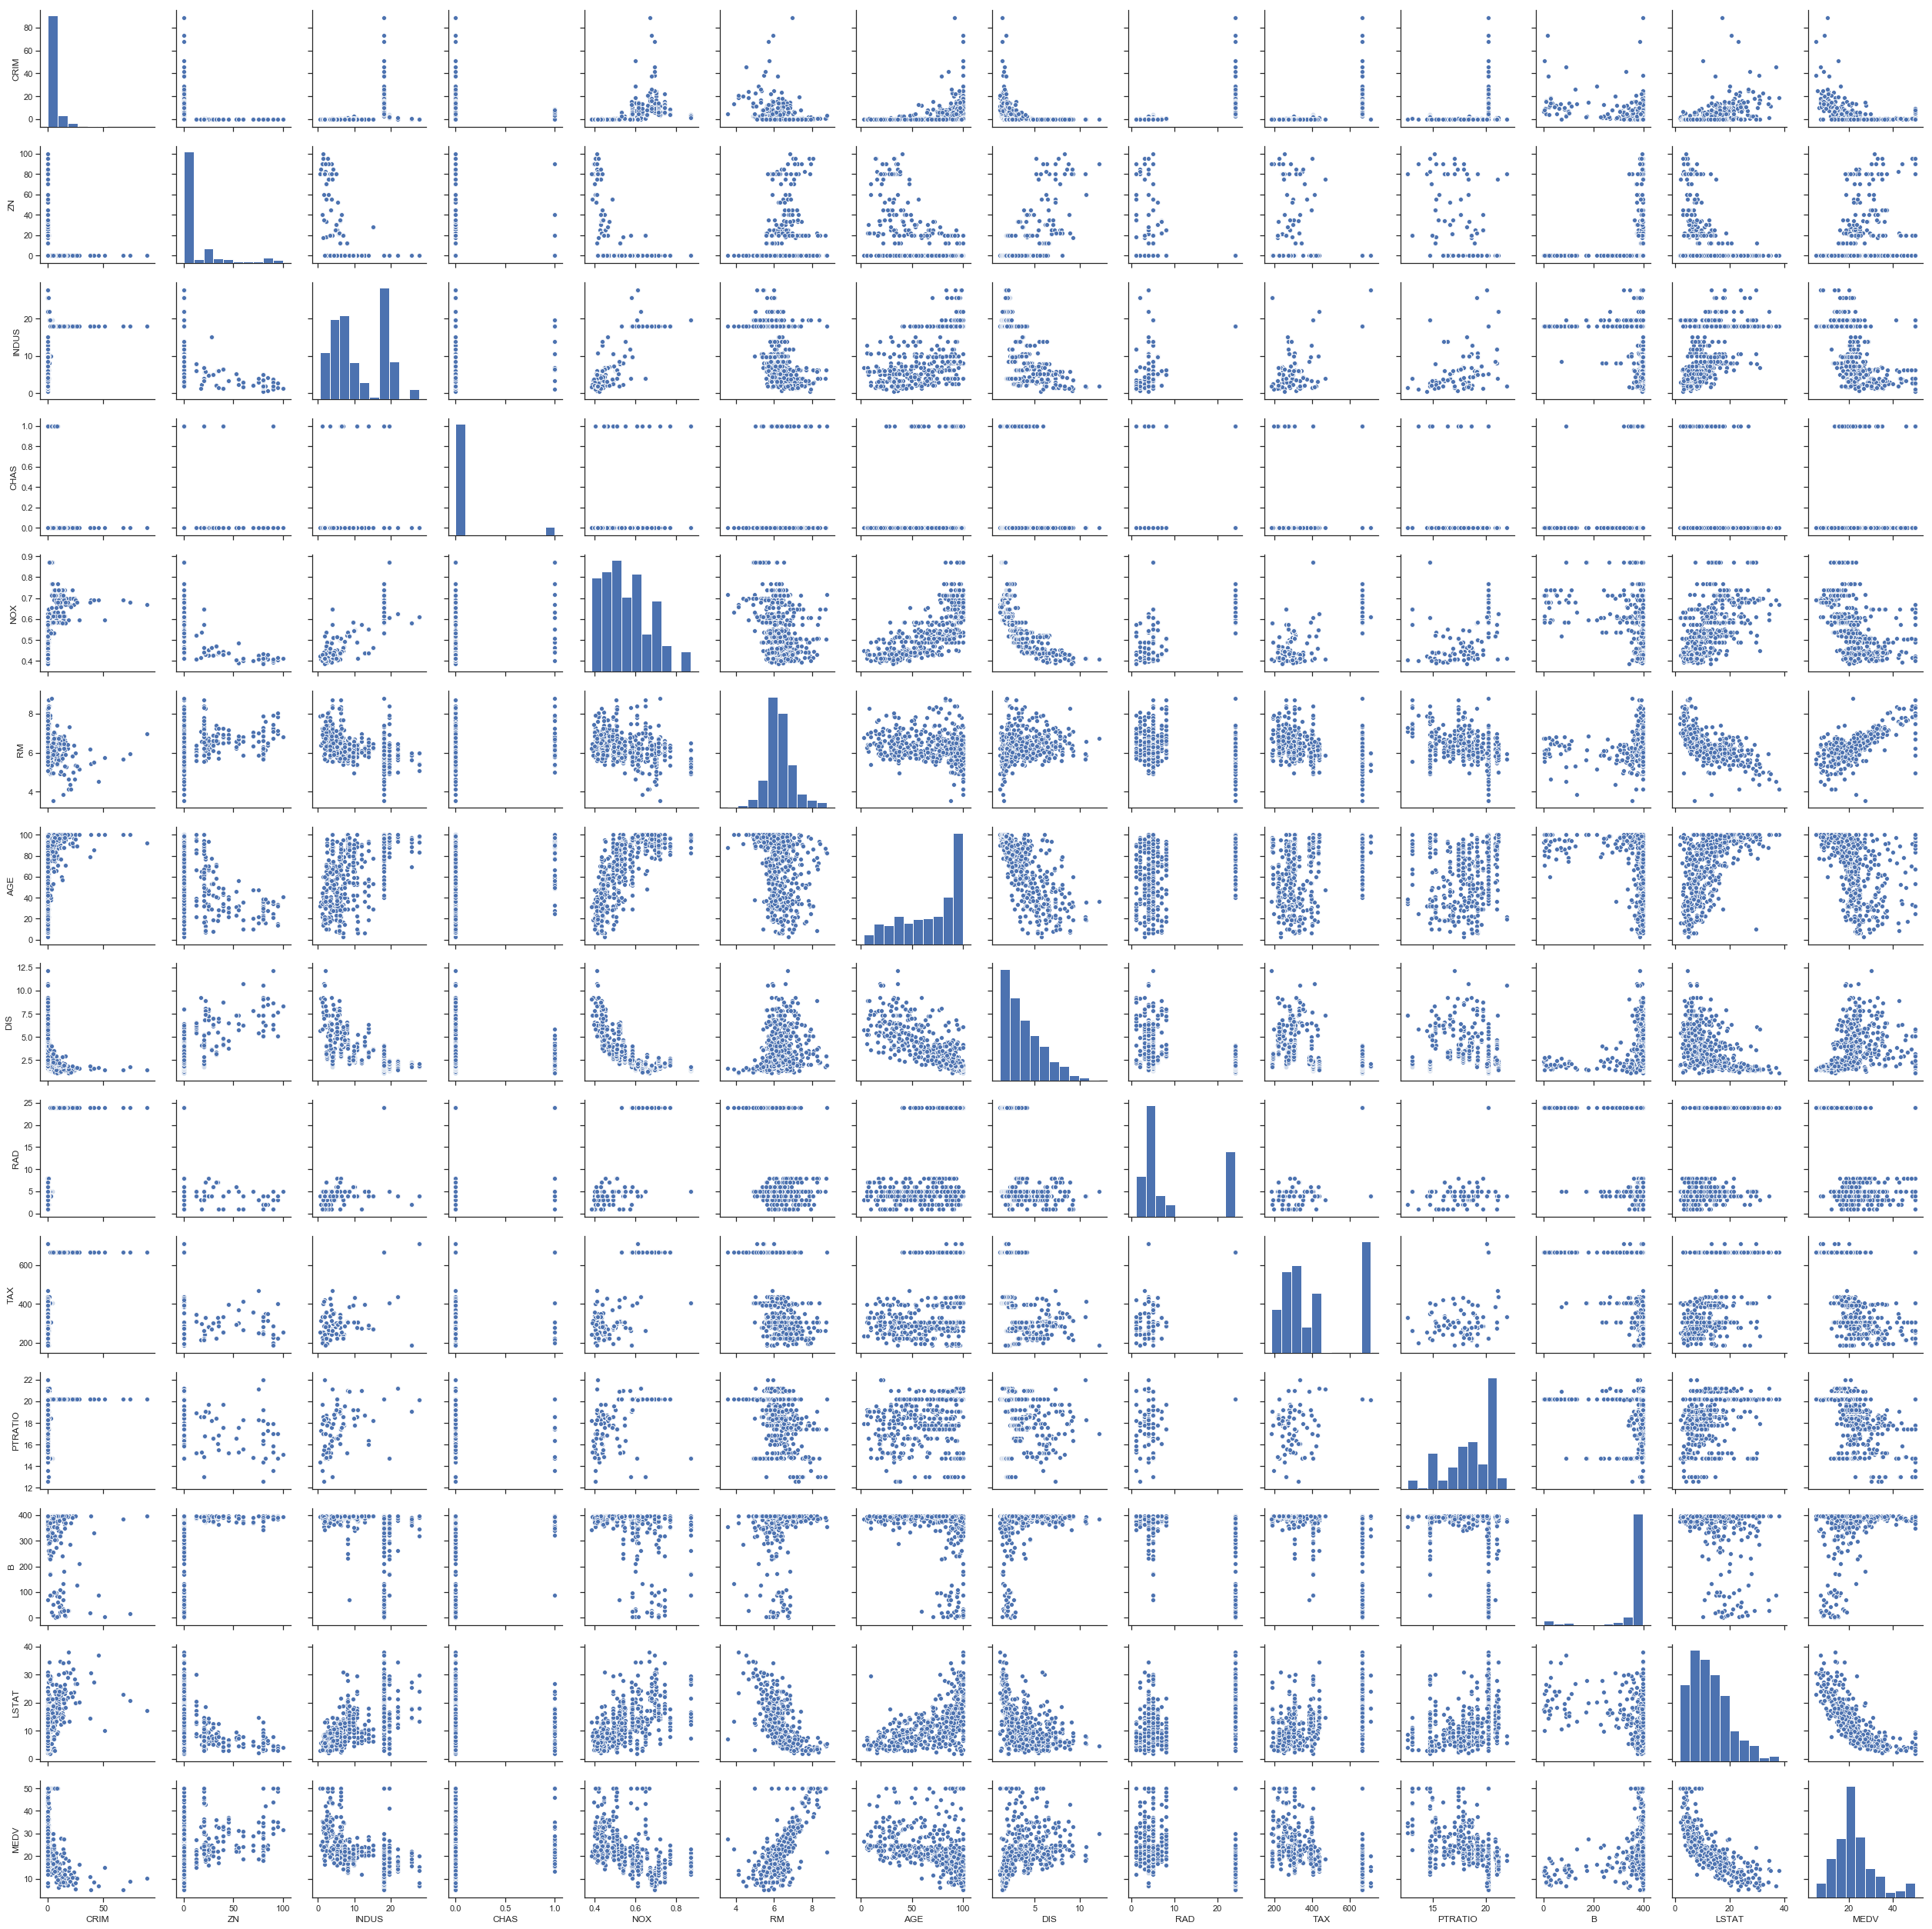

In [9]:
sns.set(style="ticks", color_codes=True)
g = sns.pairplot(data)

In [ ]:
Нарисовать частотные графики для всех значений. Можете ли вы найти следующие распределения в данных графиках?


1.   Нормальное  - RM
2.   Равномерное - нет
3.   Биноминальное - RAD
4.   Бернулли -CHAS
5.   Геометрическое - DIS
6.   Логнормальное - LSTAT



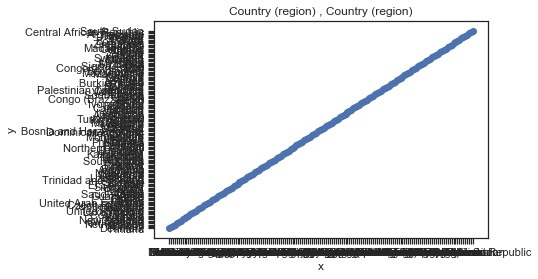

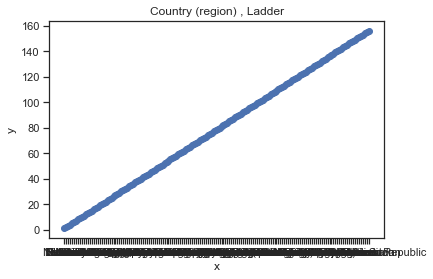

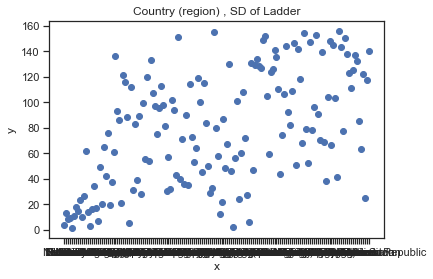

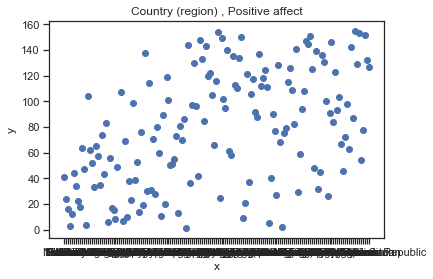

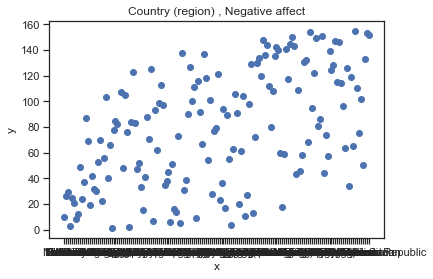

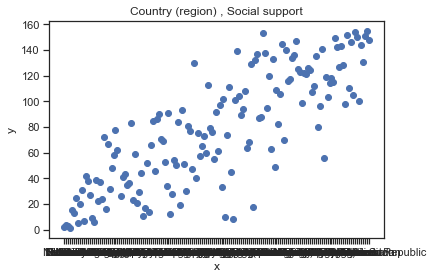

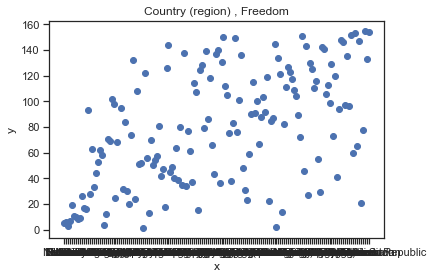

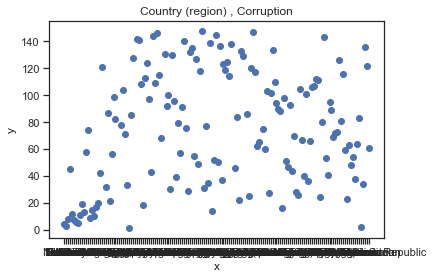

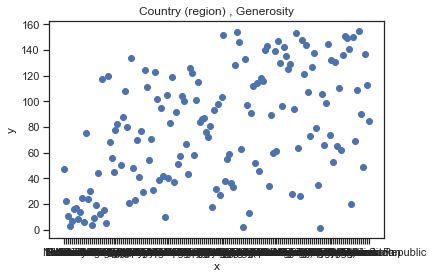

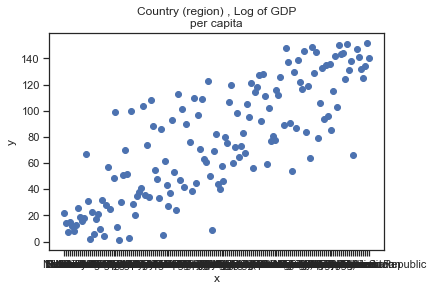

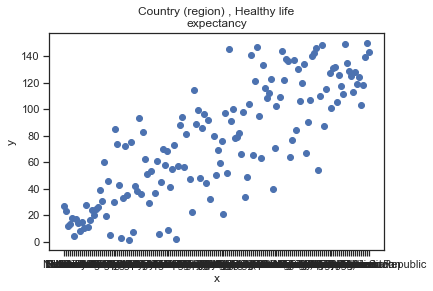

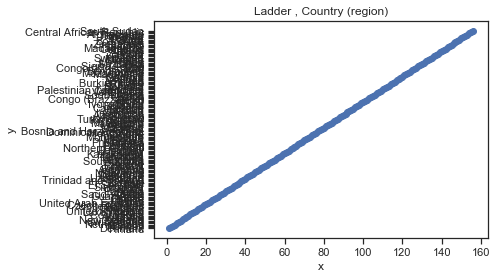

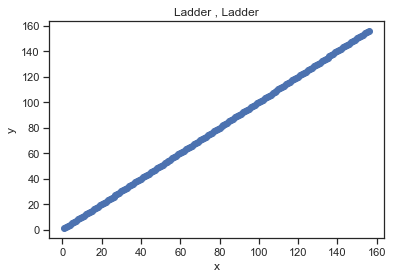

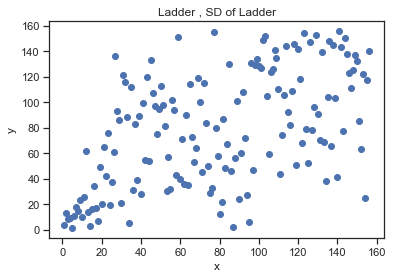

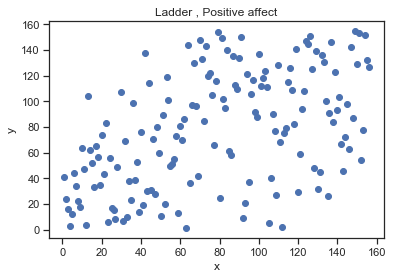

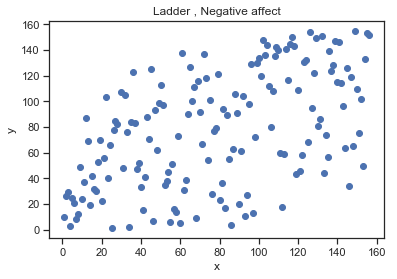

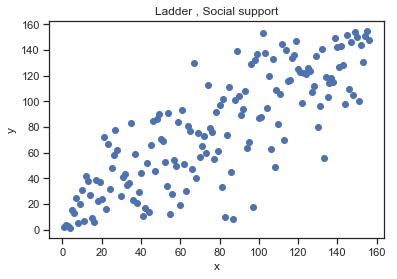

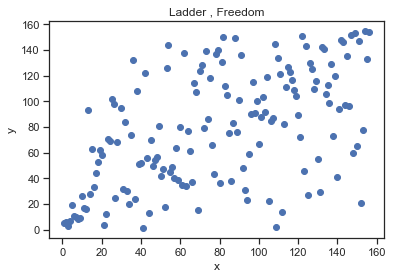

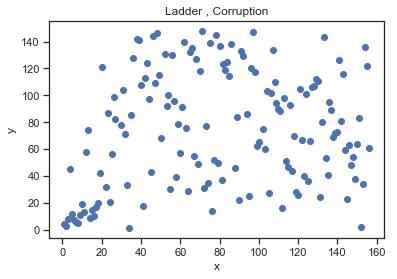

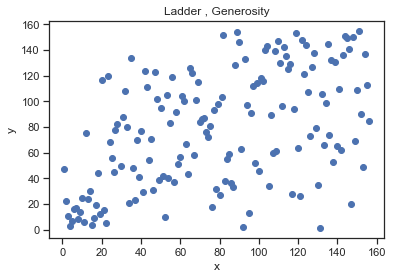

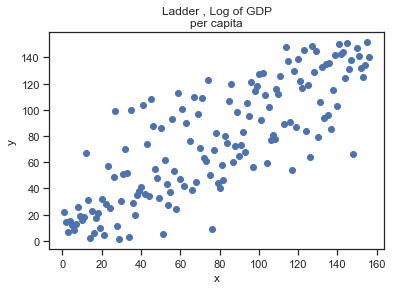

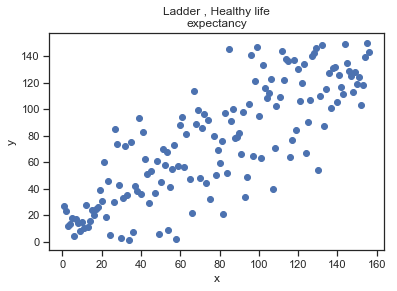

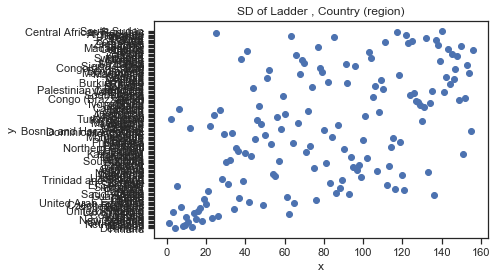

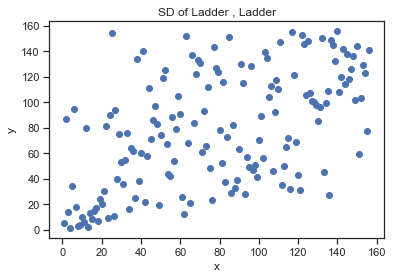

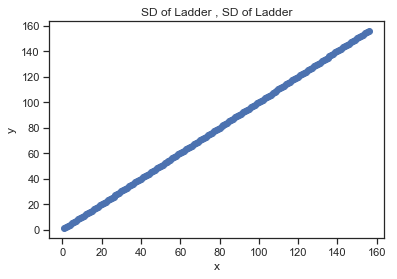

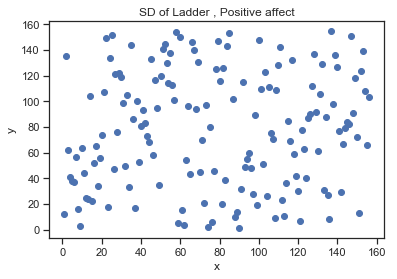

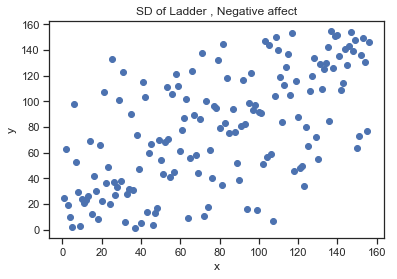

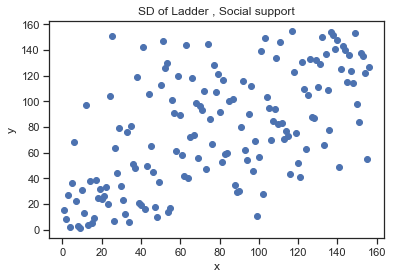

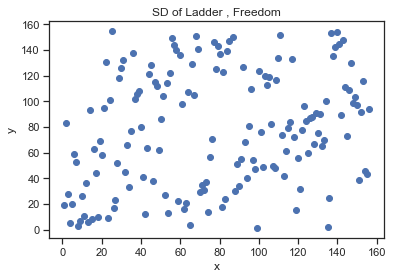

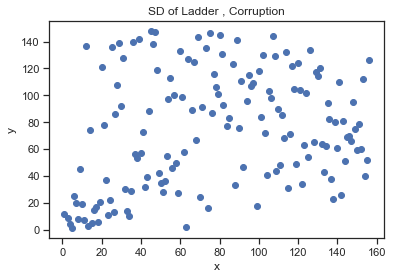

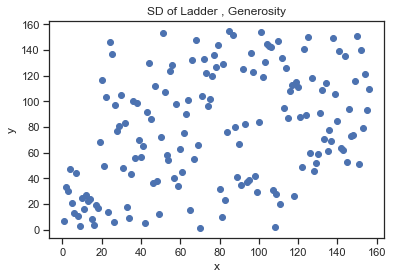

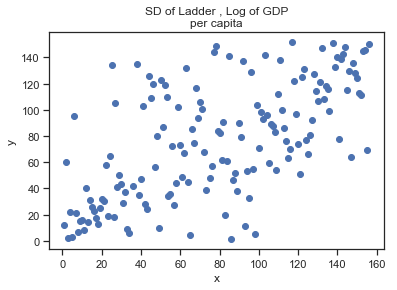

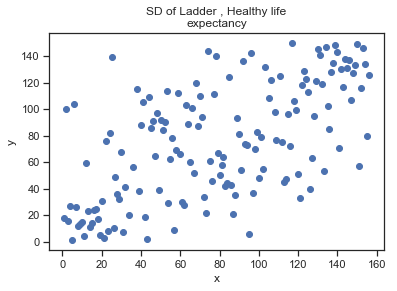

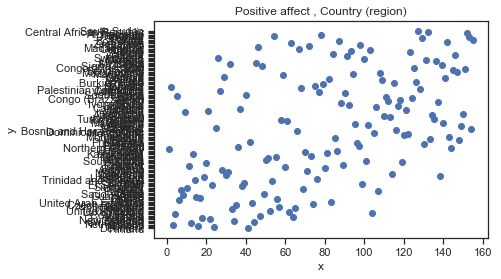

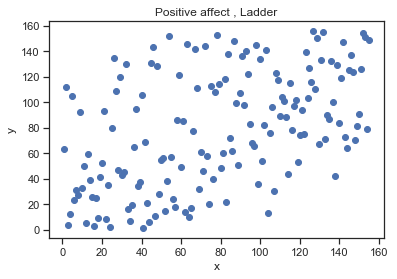

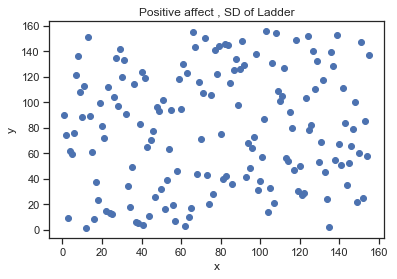

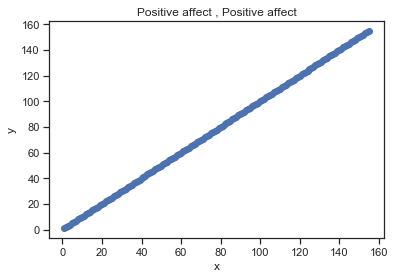

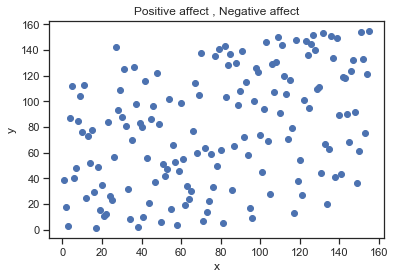

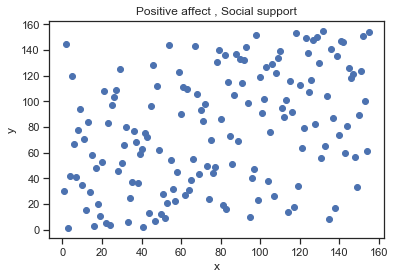

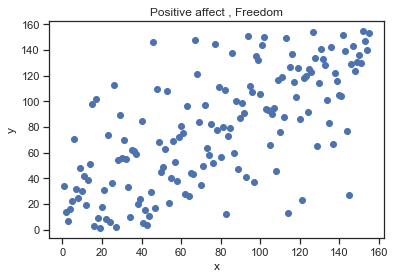

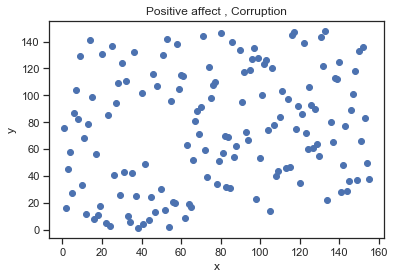

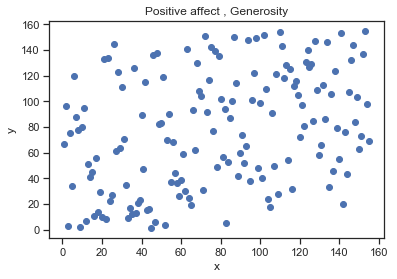

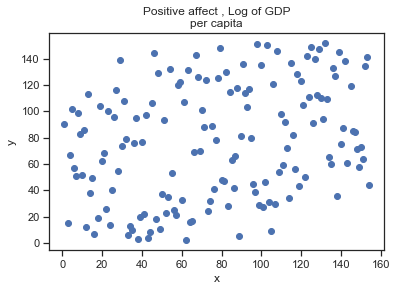

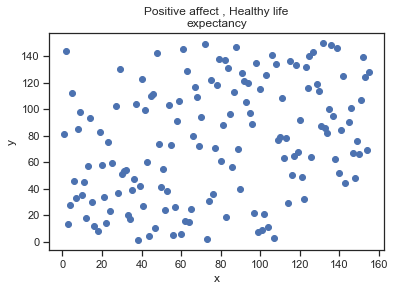

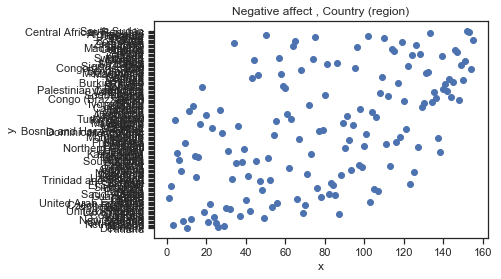

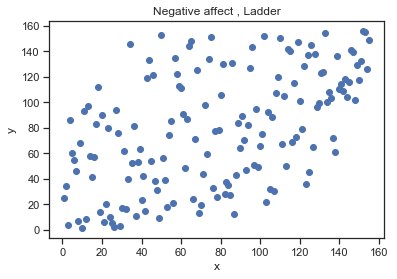

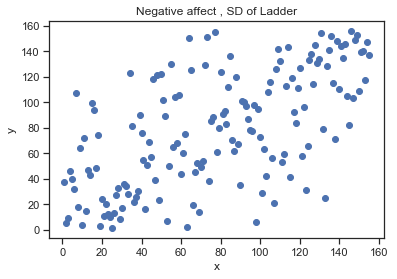

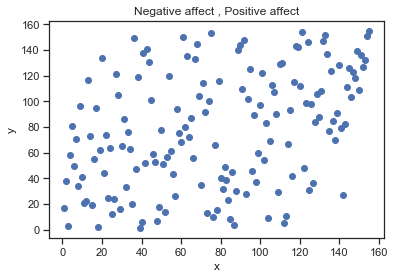

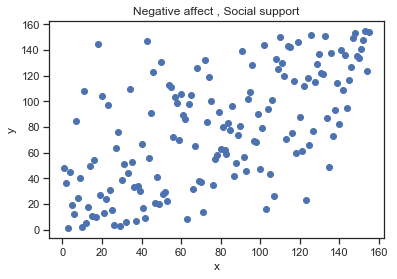

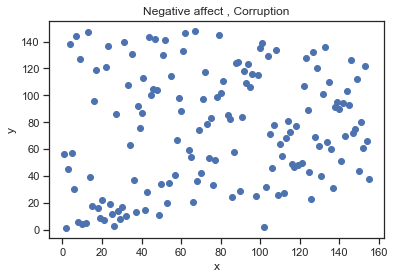

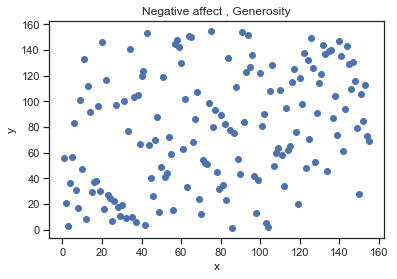

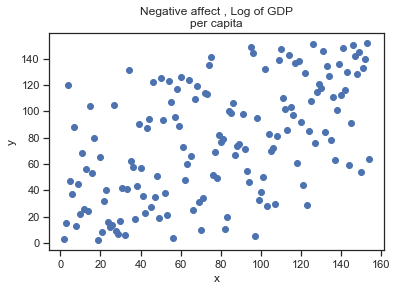

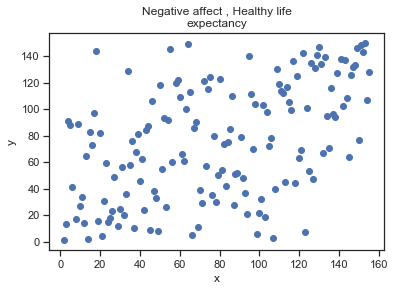

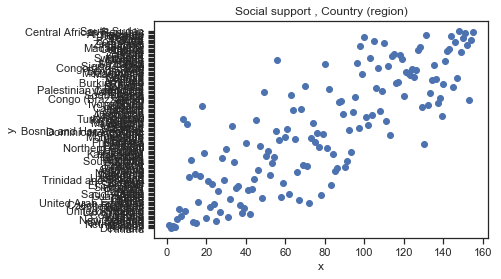

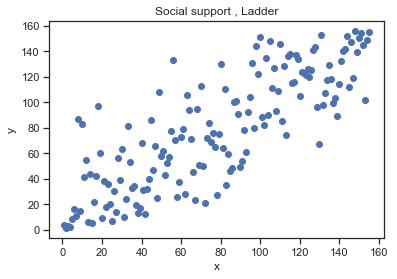

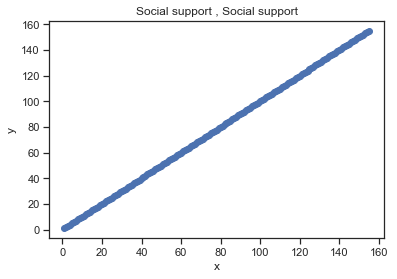

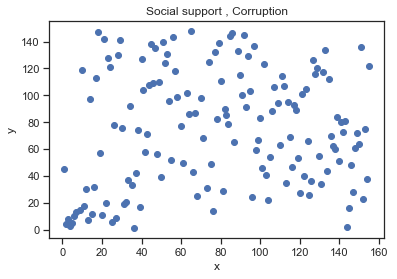

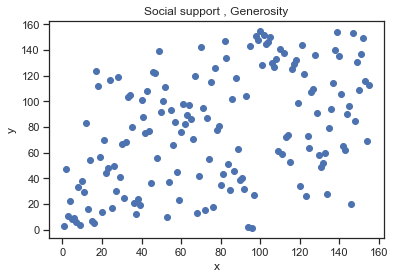

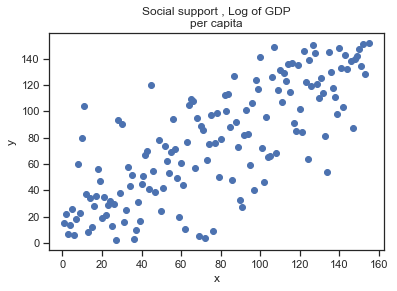

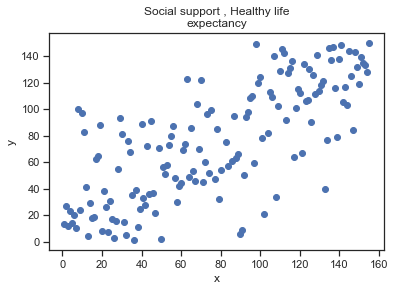

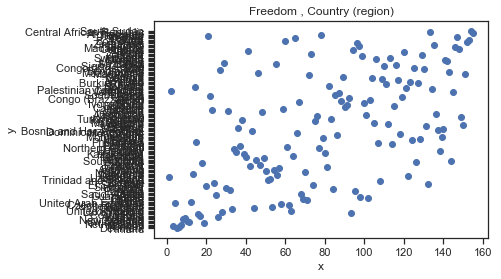

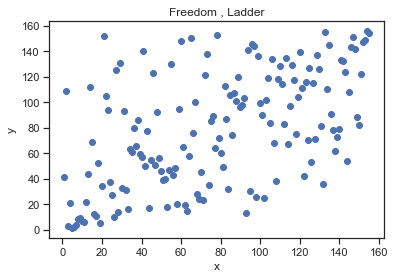

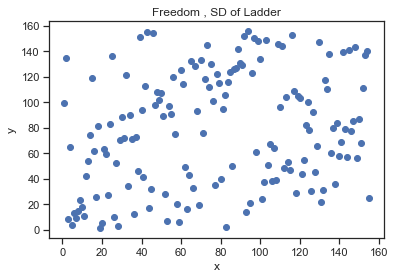

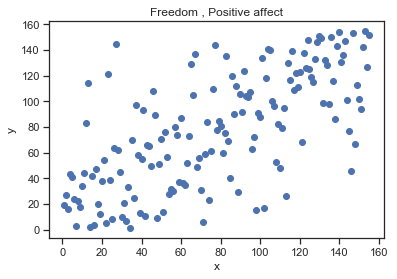

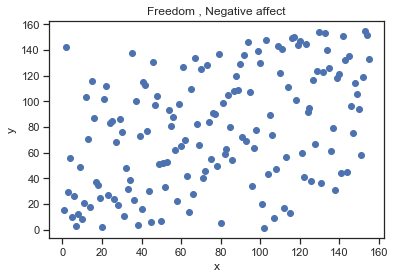

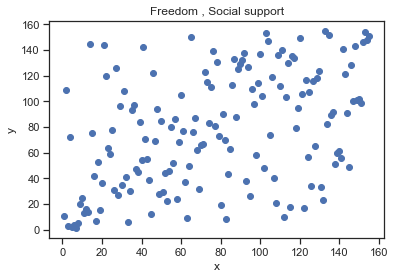

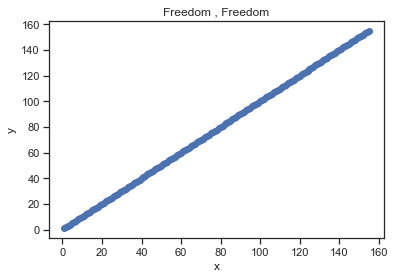

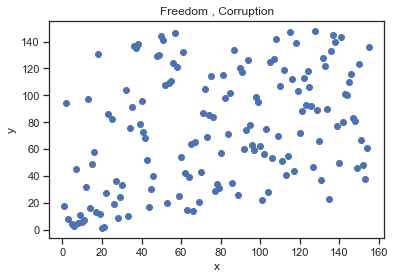

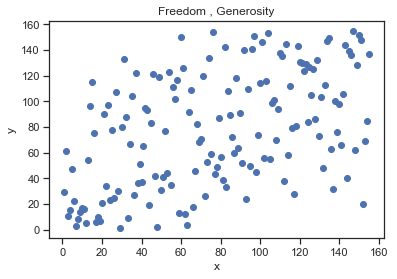

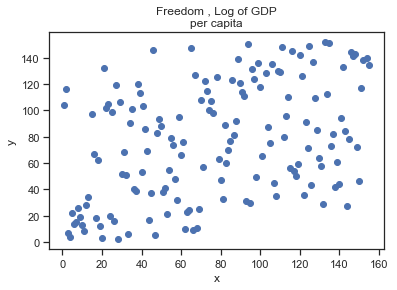

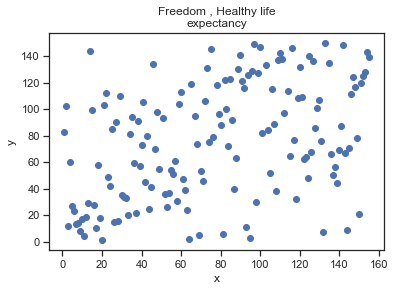

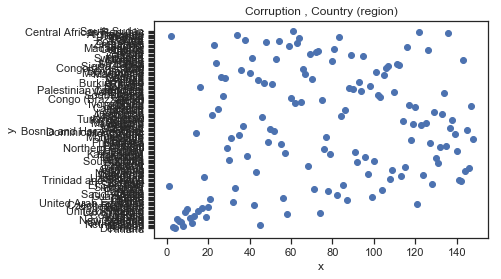

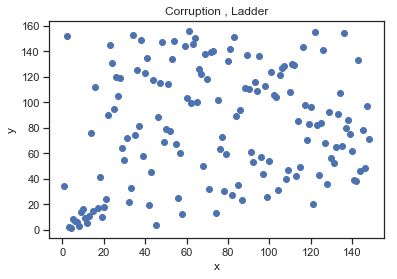

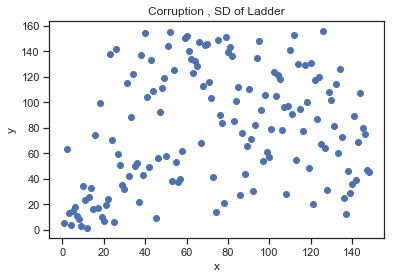

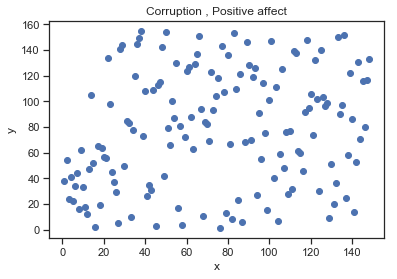

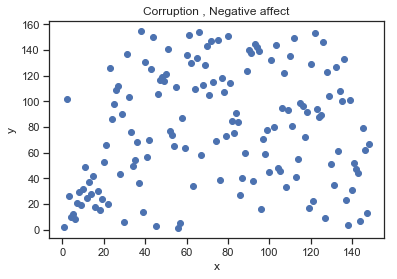

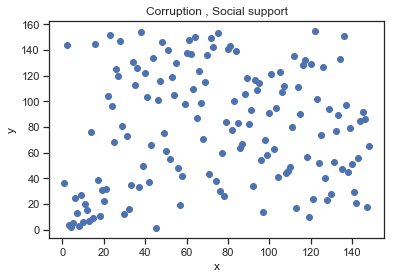

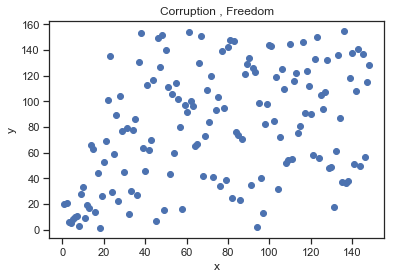

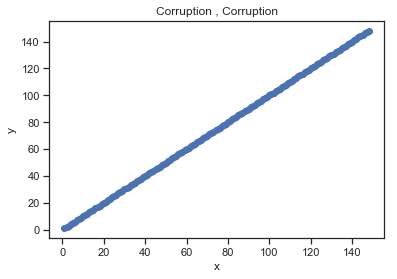

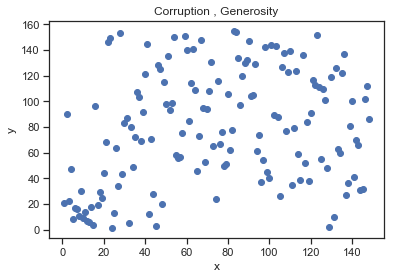

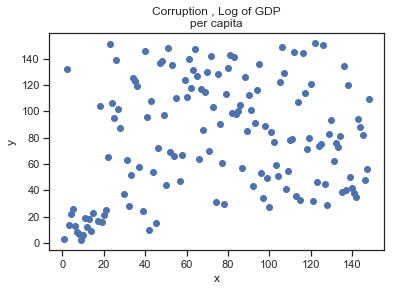

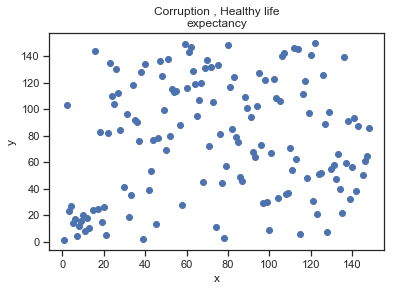

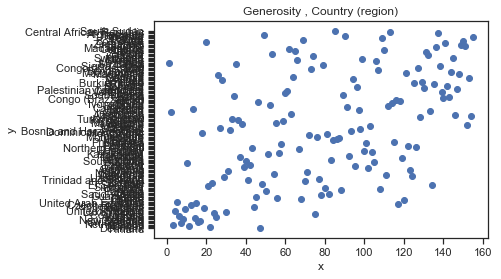

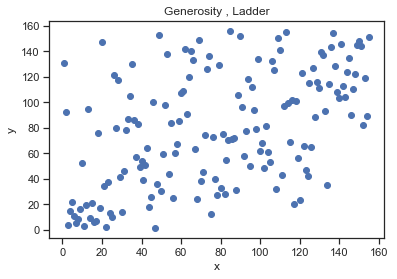

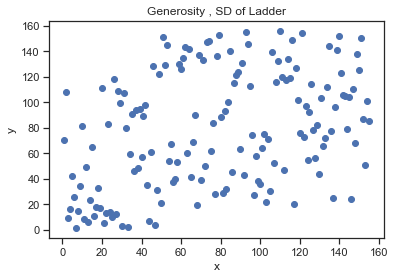

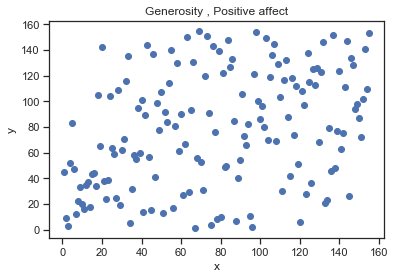

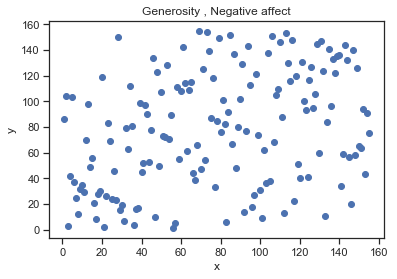

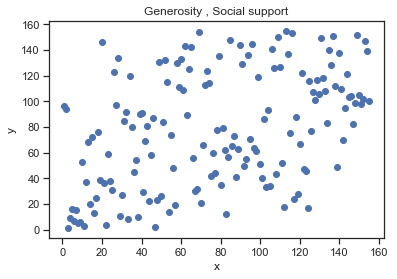

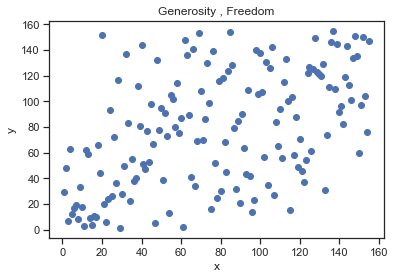

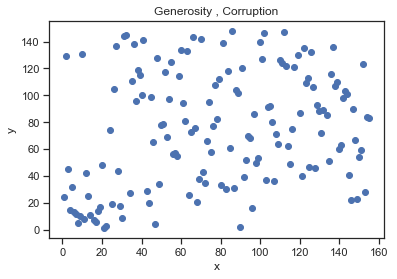

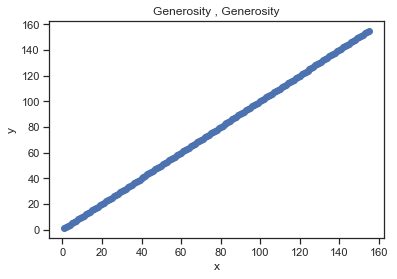

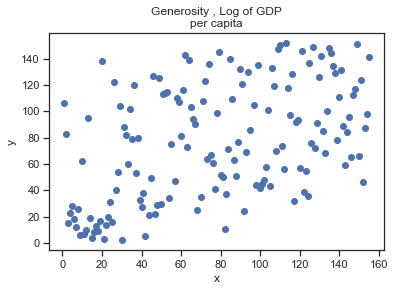

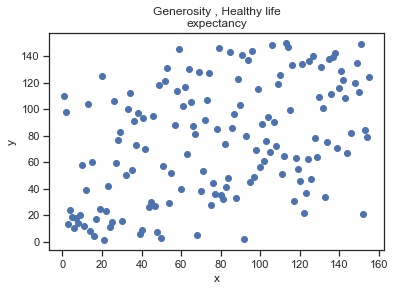

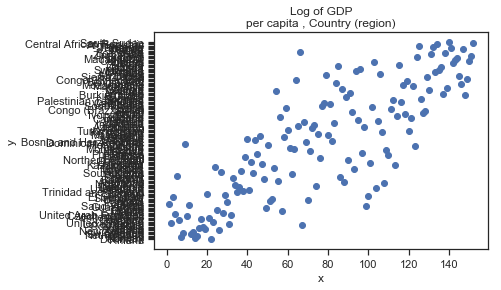

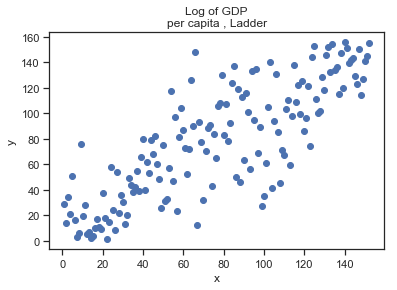

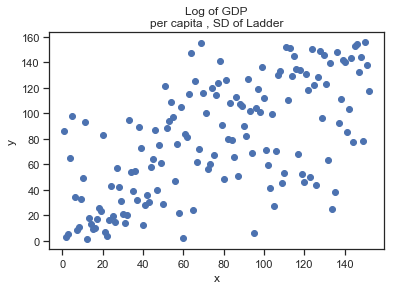

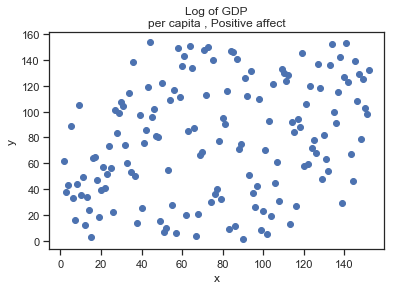

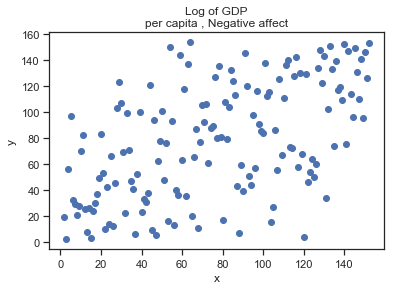

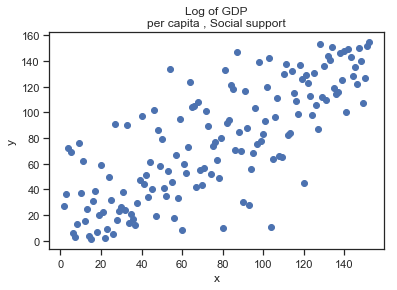

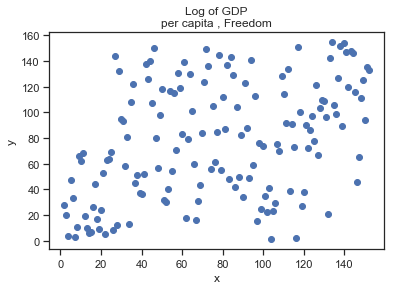

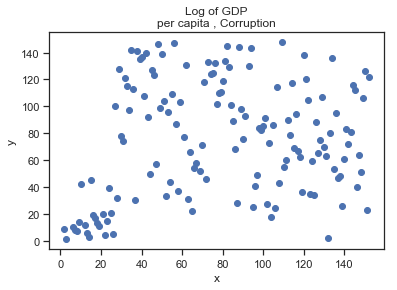

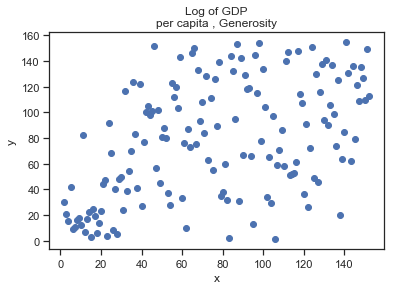

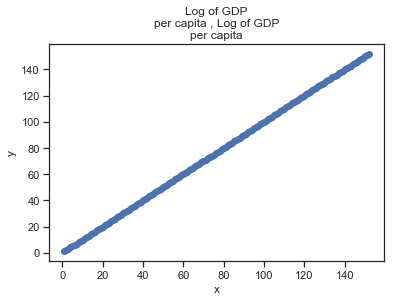

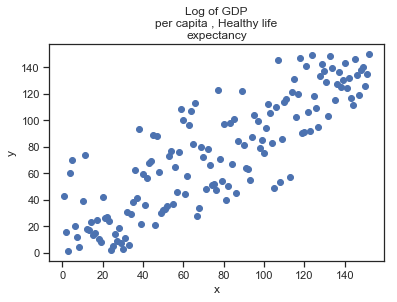

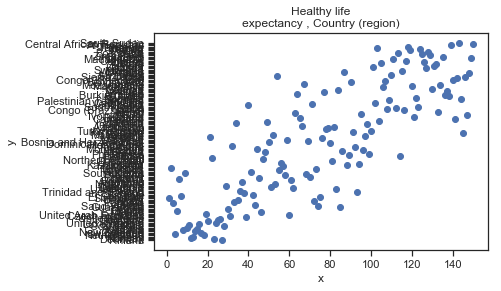

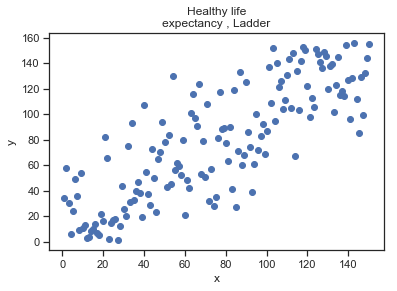

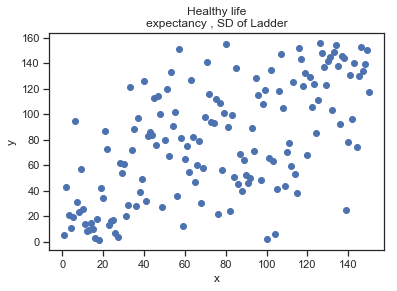

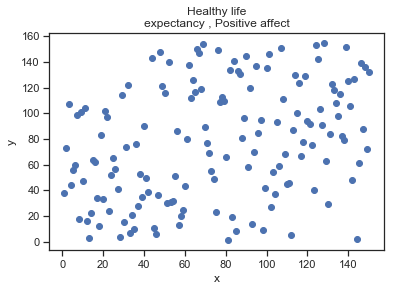

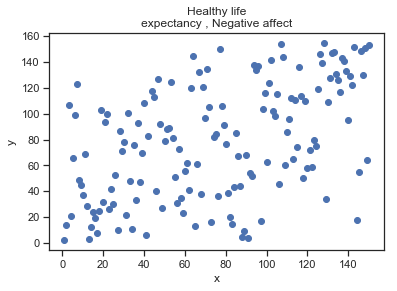

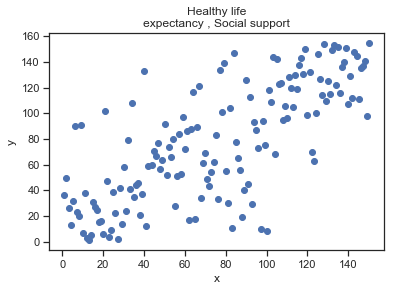

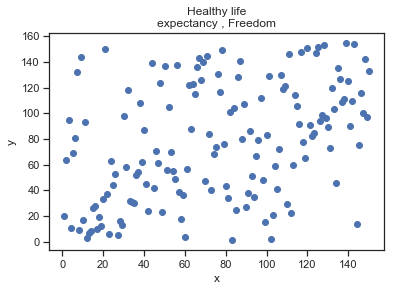

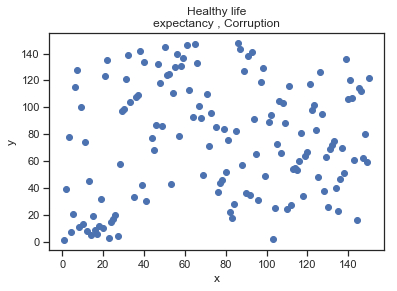

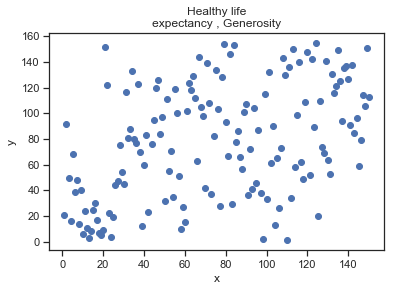

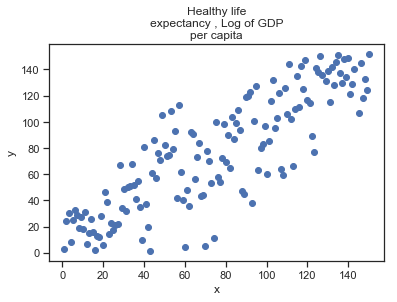

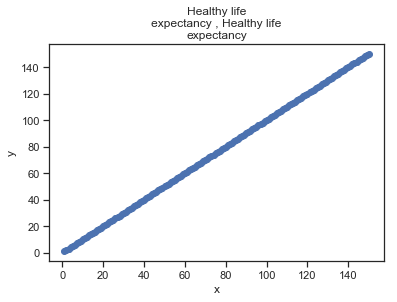

In [36]:
# Напишите код, который будет рисовать распределения попарно - точечные распределение
url="http://yustiks.ru/dataset/world-happiness-report-2019.csv"
df=pd.read_csv(url)
for i in df.columns:
    for j in df.columns:
        plt.figure()
        plt.scatter(df[i],df[j])
        plt.title(''+ i +' , '+ j)
        plt.xlabel('x')
        plt.ylabel('y')
        plt.show()

Загрузить таблицу Happiness report. Нарисовать матрицу ковариаций попарно. 

In [3]:
url="http://yustiks.ru/dataset/world-happiness-report-2019.csv"
data=pd.read_csv(url)
data.head()

Country (region)  Ladder  SD of Ladder  Positive affect  Negative affect  \
0          Finland       1             4             41.0             10.0   
1          Denmark       2            13             24.0             26.0   
2           Norway       3             8             16.0             29.0   
3          Iceland       4             9              3.0              3.0   
4      Netherlands       5             1             12.0             25.0   

   Social support  Freedom  Corruption  Generosity  Log of GDP\nper capita  \
0             2.0      5.0         4.0        47.0                    22.0   
1             4.0      6.0         3.0        22.0                    14.0   
2             3.0      3.0         8.0        11.0                     7.0   
3             1.0      7.0        45.0         3.0                    15.0   
4            15.0     19.0        12.0         7.0                    12.0   

   Healthy life\nexpectancy  
0                      27.0  
1                      23.0  
2                      12.0  
3                      13.0  
4                      18.0

Сколько в данной таблице отсутствующих значений? Написать ответ. Если есть отсутствующие значения в выборке country, убрать (drop). Написать код.

In [58]:
data.isnull().sum()

Country (region)            0
Ladder                      0
SD of Ladder                0
Positive affect             1
Negative affect             1
Social support              1
Freedom                     1
Corruption                  8
Generosity                  1
Log of GDP\nper capita      4
Healthy life\nexpectancy    6
dtype: int64

In [75]:
data = data.dropna()
X = data.drop('Country (region)', axis =1 )
standardized = (X - X.mean()) / X.std()
np.cov(standardized.T)

array([[1.        , 0.55598652, 0.51186994, 0.53967651, 0.83341164,
        0.54641367, 0.22439426, 0.48570397, 0.82060756, 0.82667749],
       [0.55598652, 1.        , 0.09033207, 0.63273394, 0.6000868 ,
        0.25024565, 0.25334428, 0.38633667, 0.66397713, 0.6375542 ],
       [0.51186994, 0.09033207, 1.        , 0.35190627, 0.43333255,
        0.69656705, 0.22590489, 0.41706116, 0.31084267, 0.33903234],
       [0.53967651, 0.63273394, 0.35190627, 1.        , 0.67138722,
        0.41593489, 0.16647247, 0.35054093, 0.56575636, 0.50714773],
       [0.83341164, 0.6000868 , 0.43333255, 0.67138722, 1.        ,
        0.47861307, 0.14888995, 0.44813453, 0.80189757, 0.75529202],
       [0.54641367, 0.25024565, 0.69656705, 0.41593489, 0.47861307,
        1.        , 0.4075713 , 0.49822612, 0.38591935, 0.42394886],
       [0.22439426, 0.25334428, 0.22590489, 0.16647247, 0.14888995,
        0.4075713 , 1.        , 0.2811459 , 0.18614014, 0.1489734 ],
       [0.48570397, 0.38633667, 0.4170611

Сколько стран в выборке? Написать ответ. Можно ли сказать, что данные значения - это **проблема классификации**?

In [62]:
data['Country (region)'].count()

140

Нарисовать sns.pairplot для класс - страна. Из графика сделать вывод о том, какие страны похожи.

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


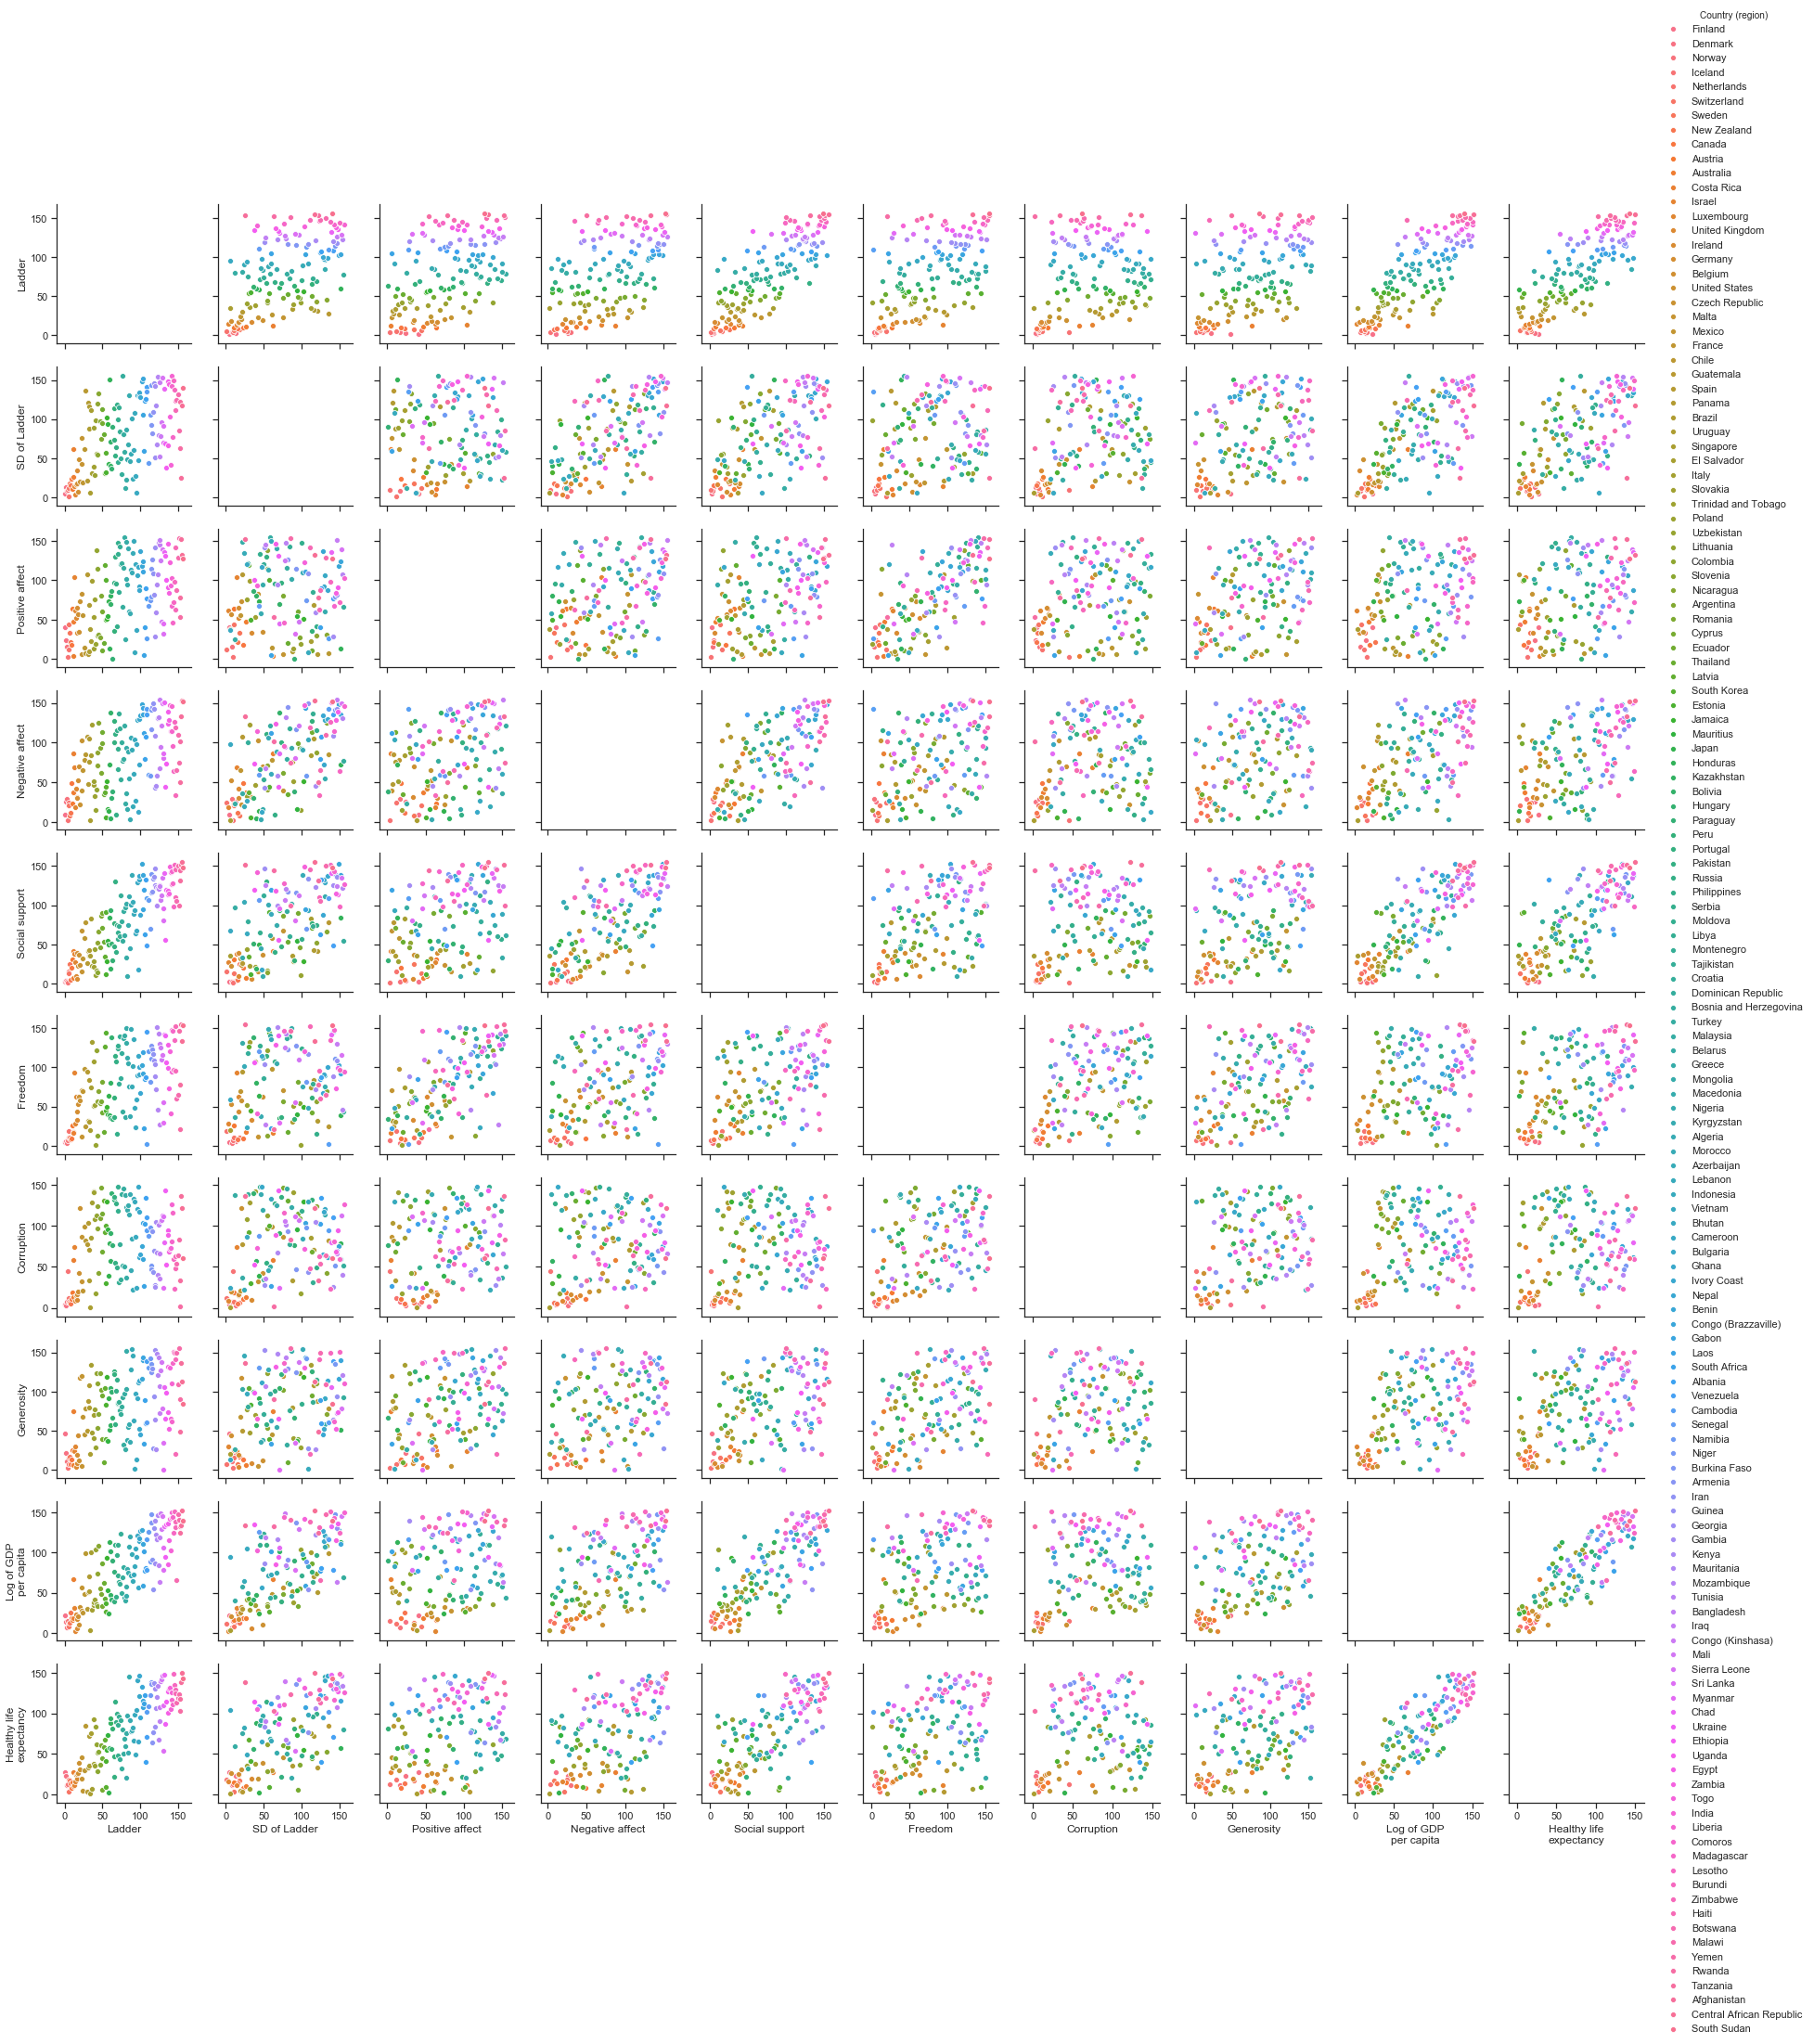

In [4]:
# Если код ниже не работает, измените код, используя материал лекций. Пишите на почту, если испытываете проблемы: yustiks@gmail.com
sns.set(style="ticks", color_codes=True)
data = data.dropna()
fig = sns.pairplot(data=data, hue='Country (region)')


In [ ]:
South Sudan, Central African Republic - нижняя группа
Finland, Denmark - верхняя группа

Посчитать матрицу корреляций для таблицы. Написать код. Сделать график. Какие можно сделать выводы?

In [5]:
data.corr()

Ladder  SD of Ladder  Positive affect  \
Ladder                    1.000000      0.555987         0.511870   
SD of Ladder              0.555987      1.000000         0.090332   
Positive affect           0.511870      0.090332         1.000000   
Negative affect           0.539677      0.632734         0.351906   
Social support            0.833412      0.600087         0.433333   
Freedom                   0.546414      0.250246         0.696567   
Corruption                0.224394      0.253344         0.225905   
Generosity                0.485704      0.386337         0.417061   
Log of GDP\nper capita    0.820608      0.663977         0.310843   
Healthy life\nexpectancy  0.826677      0.637554         0.339032   

                          Negative affect  Social support   Freedom  \
Ladder                           0.539677        0.833412  0.546414   
SD of Ladder                     0.632734        0.600087  0.250246   
Positive affect                  0.351906        0.433333  0.696567   
Negative affect                  1.000000        0.671387  0.415935   
Social support                   0.671387        1.000000  0.478613   
Freedom                          0.415935        0.478613  1.000000   
Corruption                       0.166472        0.148890  0.407571   
Generosity                       0.350541        0.448135  0.498226   
Log of GDP\nper capita           0.565756        0.801898  0.385919   
Healthy life\nexpectancy         0.507148        0.755292  0.423949   

                          Corruption  Generosity  Log of GDP\nper capita  \
Ladder                      0.224394    0.485704                0.820608   
SD of Ladder                0.253344    0.386337                0.663977   
Positive affect             0.225905    0.417061                0.310843   
Negative affect             0.166472    0.350541                0.565756   
Social support              0.148890    0.448135                0.801898   
Freedom                     0.407571    0.498226                0.385919   
Corruption                  1.000000    0.281146                0.186140   
Generosity                  0.281146    1.000000                0.459762   
Log of GDP\nper capita      0.186140    0.459762                1.000000   
Healthy life\nexpectancy    0.148973    0.453135                0.873628   

                          Healthy life\nexpectancy  
Ladder                                    0.826677  
SD of Ladder                              0.637554  
Positive affect                           0.339032  
Negative affect                           0.507148  
Social support                            0.755292  
Freedom                                   0.423949  
Corruption                                0.148973  
Generosity                                0.453135  
Log of GDP\nper capita                    0.873628  
Healthy life\nexpectancy                  1.000000

**Регрессионный анализ** - можно ли провести линейную зависимость между двумя выборками. Возьмем Ladder - удовлетворение жизнью, и generosity - доброта. Мы хотим найти прямую, которая разделит точки в пространстве наполовину. Это можно сделать графически. Нарисовать график. Можно ли сказать, что данная прямая является собственным вектором? При проецировании данных на эту прямую разброс данных максимален?

# Дискретное распределение случайной величины

Напишите код для моделирования 10 подбрасываний игрального кубика. Начертите диаграму histogram. Какое это распределение?

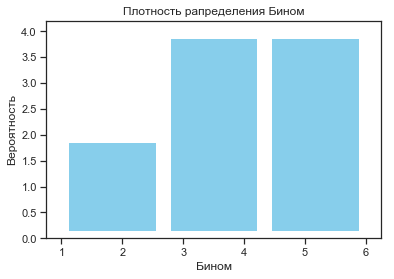

In [23]:
# import seaborn
import seaborn as sns
rng = np.random.RandomState(89)

data_binom = rng.randint(1, 7, size=10)

ax= sns.distplot(data_binom,
                 kde=False,
                 color="skyblue",
                 hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='Бином', ylabel='Вероятность')
plt.title('Плотность рапределения Бином')
plt.show()

Напишите код для моделирования 1000 подбрасываний игрального кубика. Начертите диаграму histogram. Почему график изменился? Как применить центральную предельную теорему?

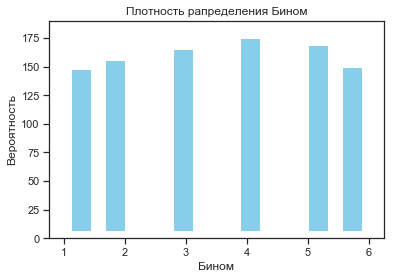

In [27]:
rng = np.random.RandomState(100)

data_binom = rng.randint(1, 7, size=1000)

ax= sns.distplot(data_binom,
                 kde=False,
                 color="skyblue",
                 hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='Бином', ylabel='Вероятность')
plt.title('Плотность рапределения Бином')
plt.show()

In [ ]:
Посмотрим отклонение от среднего значения игральной кости 3.5
в зависимости от количества экспериментов
получим нормальное распределение, согласно предельной теоремы 


1 experiment with coin flips:  [4 1 6 4 5 4 3 3 4 4 5 4 6 2 3 4 6 2 6 1 4 2 1 2 3 1 2 1 6 4 3 6 2 4 5 3 1
 2 1 3 4 2 2 5 5 2 2 5 2 1 4 3 5 4 4 2 4 1 2 3 3 4 1 1 5 3 1 4 6 3 3 3 3 2
 5 4 4 3 5 4 1 4 6 6 4 6 3 3 3 3 5 6 2 1 1 4 3 1 1 4]


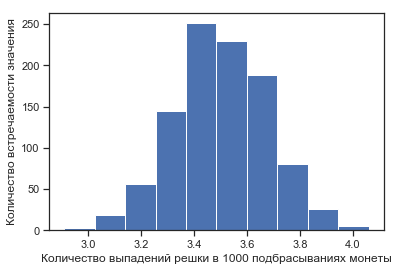

In [35]:
n_experiments = 1000
n_bernoulli_trials = 100

rng = np.random.RandomState(123)
outcomes = np.empty(n_experiments, dtype=np.float)

for i in range(n_experiments):
    coin_flips = rng.randint(1, 7, size=n_bernoulli_trials)
    # coin_flips - выборка из 100 подбрасываний
    head_counts = np.mean(coin_flips)
    outcomes[i] = head_counts

print('1 experiment with coin flips: ', coin_flips)
plt.hist(outcomes)
plt.xlabel('Количество выпадений решки в 1000 подбрасываниях монеты')
plt.ylabel('Количество встречаемости значения')
plt.show()